# PROJECT 1: Exploratory data analysis using Matplotlib/ Nonparametric inference using bootstrap simulation

HONORE NGUESSAN

OCTOBER 26, 2019

# INTRODUCTION

In our project, we are assigned to do an exploratory data analysis using Matplotlib and a nonparametric inference using bootstrap simulation. We will use the data frame named titanic3 that describes the survival status of individual passengers on the Titanic. That dataset is from:http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt. There are 1309 observations and 14 Variables.There are four type of variables:

Numerical Features: Age, Fare, SibSp and Parch

Categorical Features: Sex, Embarked, Survived and Pclass

Alphanumeric Features: Ticket and Cabin(Contains both alphabets and the numeric value)

Text Features: Name

I'm interested in the relationship between the passenger fare (cost of a ticket) and possibility to survive. Otherwise, I want to know whether or not the passenger class could lead to death or not. 

Notes: Fare is in Pre-1970 British Pounds (£)
The titanic3 data frame does not contain information for the crew, but it does contain actual and estimated ages for almost 80% of the passengers.



# 1- Reading the Data

In [ ]:
# Importing libraires
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd

In [357]:
# Read the .CVS file
df=pd.read_csv('titanic3.csv')
print(df)
type(df)

      pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                                Anderson, Mr. Harry   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
7          1         0                             Andrews, Mr. Thomas Jr   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                            Artagaveytia, Mr. Ramon   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   

pandas.core.frame.DataFrame

# 2- Dimensions and Structure of the Original Dataset

In [358]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [359]:
df.shape

(1309, 14)

In [360]:
df.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

# 3- Removing Values

In [361]:
#let's start off by dropping the coulmns we will not be needing

df2 = df.drop(["name","sibsp", "parch","ticket", "cabin", "boat", "body", "home.dest"], axis=1)

print(df2)

      pclass  survived     sex    age      fare embarked
0          1         1  female  29.00  211.3375        S
1          1         1    male   0.92  151.5500        S
2          1         0  female   2.00  151.5500        S
3          1         0    male  30.00  151.5500        S
4          1         0  female  25.00  151.5500        S
5          1         1    male  48.00   26.5500        S
6          1         1  female  63.00   77.9583        S
7          1         0    male  39.00    0.0000        S
8          1         1  female  53.00   51.4792        S
9          1         0    male  71.00   49.5042        C
10         1         0    male  47.00  227.5250        C
11         1         1  female  18.00  227.5250        C
12         1         1  female  24.00   69.3000        C
13         1         1  female  26.00   78.8500        S
14         1         1    male  80.00   30.0000        S
15         1         0    male    NaN   25.9250        S
16         1         0    male 

In [362]:
# Remove Rows With Missing Values
df2.dropna(inplace=True)
print(df2)

      pclass  survived     sex    age      fare embarked
0          1         1  female  29.00  211.3375        S
1          1         1    male   0.92  151.5500        S
2          1         0  female   2.00  151.5500        S
3          1         0    male  30.00  151.5500        S
4          1         0  female  25.00  151.5500        S
5          1         1    male  48.00   26.5500        S
6          1         1  female  63.00   77.9583        S
7          1         0    male  39.00    0.0000        S
8          1         1  female  53.00   51.4792        S
9          1         0    male  71.00   49.5042        C
10         1         0    male  47.00  227.5250        C
11         1         1  female  18.00  227.5250        C
12         1         1  female  24.00   69.3000        C
13         1         1  female  26.00   78.8500        S
14         1         1    male  80.00   30.0000        S
16         1         0    male  24.00  247.5208        C
17         1         1  female 

# 4- Dimensions and Structure of the new Dataset

In [363]:
# type of the data
df2.dtypes

pclass        int64
survived      int64
sex          object
age         float64
fare        float64
embarked     object
dtype: object

In [364]:
# dimensions
df2.shape

(1043, 6)

In [365]:
# Statistics
df2.describe()


,pclass,survived,age,fare
count,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.209012,0.407478,29.813202,36.603024
std,0.840685,0.491601,14.366254,55.753648
min,1.000000,0.000000,0.170000,0.000000
25%,1.000000,0.000000,21.000000,8.050000
50%,2.000000,0.000000,28.000000,15.750000
75%,3.000000,1.000000,39.000000,35.077100
max,3.000000,1.000000,80.000000,512.329200


In [366]:
df2.age.median()

28.0

In [367]:
df2.fare.median()

15.75

In [368]:
# group by
df2.groupby('survived').mean()

,pclass,age,fare
survived,,,
0,2.430421,30.496893,25.148752
1,1.887059,28.819035,53.258883


In [369]:
df2.groupby('sex').mean()

,pclass,survived,age,fare
sex,,,,
female,2.054404,0.751295,28.576658,50.154934
male,2.299848,0.205479,30.539696,28.641019


In [370]:
df2.groupby('pclass').mean()

,survived,age,fare
pclass,,,
1,0.634752,39.083050,92.316091
2,0.440613,29.506705,21.855044
3,0.262000,24.745000,12.879299


In [371]:
df2.groupby('embarked').mean()

,pclass,survived,age,fare
embarked,,,,
C,1.679245,0.622642,32.332170,72.474158
Q,2.780000,0.260000,28.630000,15.905918
S,2.316261,0.358515,29.205186,28.190956


# 5- Data visualization

We will use matplotlib and Seaborn packages to visualize the data throuh histogram, barplot, and boxplot.

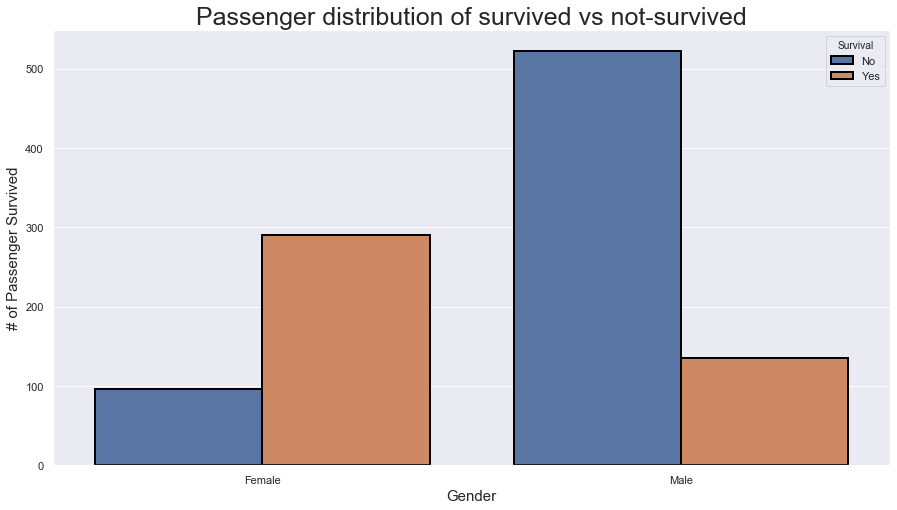

In [372]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='sex',data=df2,hue='survived',edgecolor=(0,0,0),linewidth=2)
df2.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(df2.survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survival')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

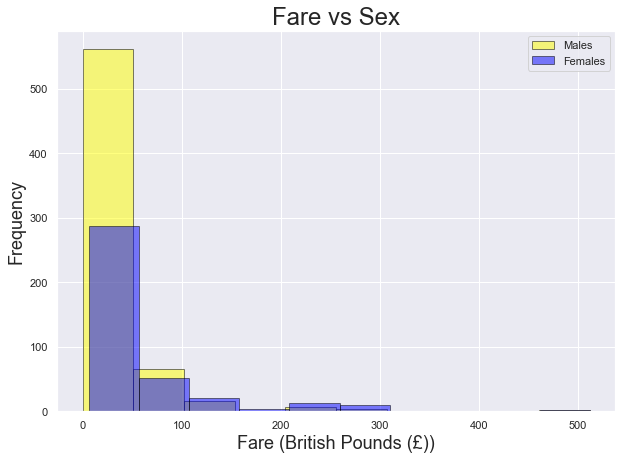

In [381]:
# Histogram of the distribution fare between males and females

df2[df2['sex']=='male'].fare.plot(kind='hist',color='yellow',edgecolor='black',alpha=0.5,figsize=(10,7))
df2[df2['sex']=='female'].fare.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title('Fare vs Sex', size=24)
plt.xlabel('Fare (British Pounds (£))', size=18)
plt.ylabel('Frequency', size=18);


([<matplotlib.axis.XTick at 0x198bc4c5ef0>,
 <a list of 3 Text xticklabel objects>)

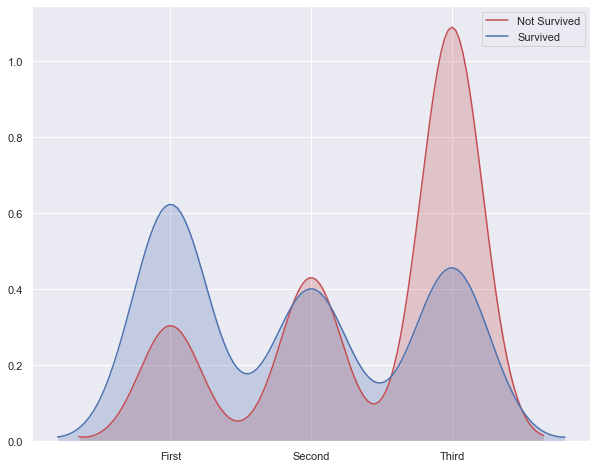

In [375]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df2.loc[(df2['survived'] == 0),'pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(df2.loc[(df2['survived'] == 1),'pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df2.pclass.unique()),labels)

Text(0.5, 0, 'Fare')

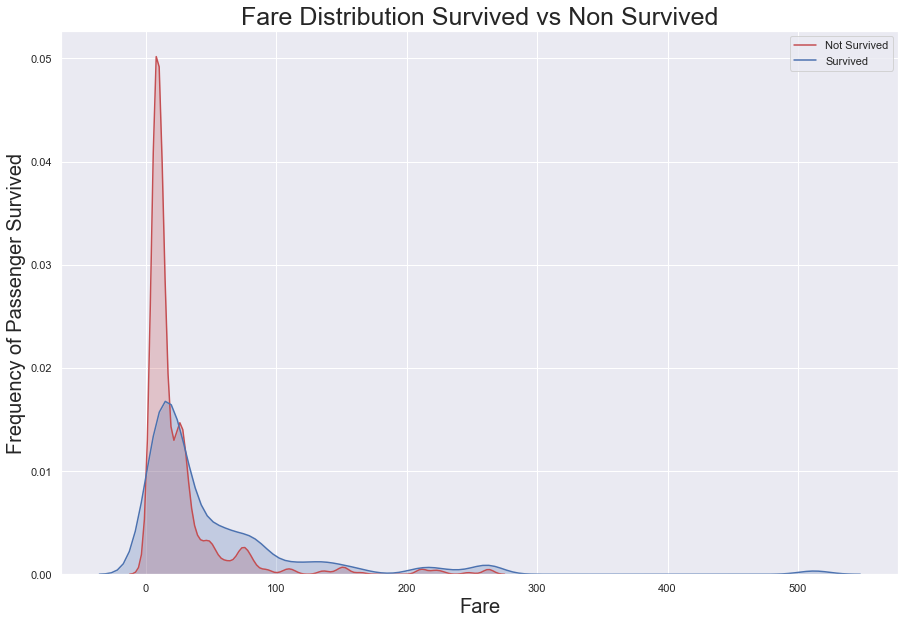

In [376]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(df2.loc[(df2['survived'] == 0),'fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(df2.loc[(df2['survived'] == 1),'fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

# 6- Bootstrap simulation

The sample size should be about 10% of the original dataset. Then, we have 1309/0.1 = 130.9 or 131. Also, we will simulate a nonparametric inference of the Median for a quantitative variable, which is the passenger fare. 

In [382]:
data_sample = df2.fare[np.random.choice(df2.fare.index, 131)]
data_sample.median()

21.0

In [383]:
type(data_sample)

pandas.core.series.Series

In [384]:
#np.random.seed(111)
resamples_medians = pd.Series(index = np.arange(1000))
for i in range(1000):
    resamples_medians[i] = data_sample.sample(131, replace=True).median()
    
print(resamples_medians.median())
print(resamples_medians.mean())
print(resamples_medians.quantile(0.025))
print(resamples_medians.quantile(0.975))

21.0
20.55544389999999
14.4542
26.0


In [385]:
# compare the statistics from the bootstrap sample with the original data of Heigh
sumdata = [['Median',round(np.median(df2.fare),2),round(np.median(resamples_medians),2),round(np.median(df2.fare)-np.median(resamples_medians),2)]]
sumtable = pd.DataFrame(sumdata,columns=['Stat','Original','Simulated','Delta'])
print(sumtable)

     Stat  Original  Simulated  Delta
0  Median     15.75       21.0  -5.25


Conclusion

According to our results, passengers who where in the first class died less than others. The highest rate of death was in the third class where passengers that paid less than 50 fare. From around 300 fare, all passengers were alive. I think may be those passengers had more access to lifeboat.   